# Building Autoencoders

## Data preprocessing

Prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
y_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## Building the Autoencoder Model

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Autoencoder

The autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 

In [7]:
autoencoder.fit(
  x_train, 
  x_train, 
  epochs=25, 
  batch_size=256, 
  shuffle=True, 
  validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0946 - val_loss: -49449.2305
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0944 - val_loss: -49960.6133
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0942 - val_loss: -49580.2227
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0940 - val_loss: -50195.2344
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0939 - val_loss: -50087.1172
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0937 - val_loss: -50001.2031
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0936 - val_loss: -49595.8789
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0935 - val_loss: -49547.3594
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0934 - val_loss: -49626.7539
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0933 - val_loss: -48705.7695
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0932 - val_loss: -49140.52

## Evaluating the Autoencoder

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


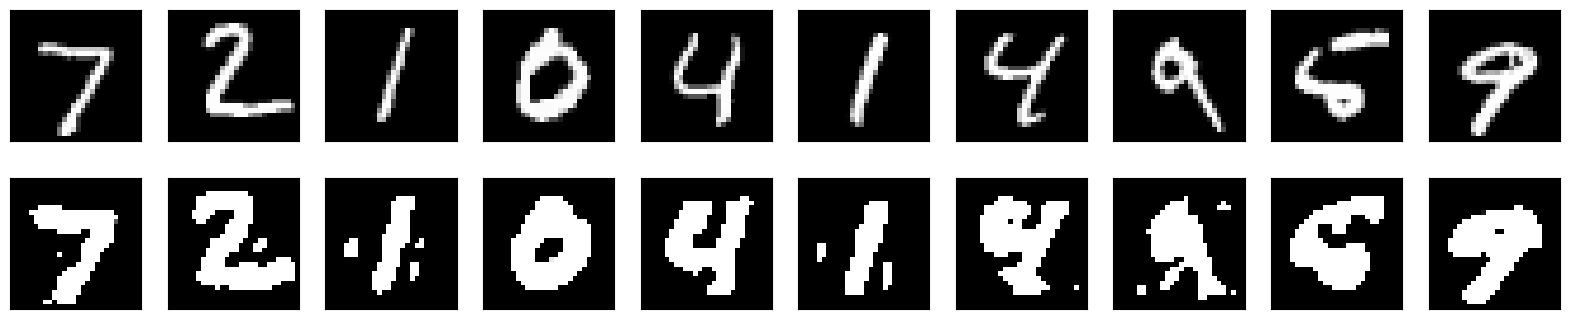

In [8]:
import matplotlib.pyplot as plt

reconstructed = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Fine-Tuning the Autoencoder

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [11]:
for layer in autoencoder.layers:
  layer.trainable = False

for i, layer in enumerate(autoencoder.layers):
  print(f"Layer {i}: {layer.name}, Trainable={layer.trainable}")

for layer in autoencoder.layers[-4:]:
  layer.trainable = True

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
  x_train, 
  x_train, 
  epochs=10, 
  batch_size=256, 
  shuffle=True, 
  validation_data=(x_test, x_test)
)


Layer 0: input_layer, Trainable=False
Layer 1: dense, Trainable=False
Layer 2: dense_1, Trainable=False
Layer 3: dense_2, Trainable=False
Layer 4: dense_3, Trainable=False
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0921 - val_loss: -47759.8320
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0919 - val_loss: -47757.9336
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0918 - val_loss: -47542.4688
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0918 - val_loss: -47516.4141
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0917 - val_loss: -47348.2695
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0917 - val_loss: -47025.1953
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0916 - val_loss: -47677.9297
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0916 - val_loss: -47181.1211
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0915 - val_loss: -46746.8125
Epoch 10/

## Denoising images with Autoencoder

Adds random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1852 - val_loss: -112.0016
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1479 - val_loss: -126.1800
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1388 - val_loss: -132.3618
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1338 - val_loss: -133.7713
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1307 - val_loss: -138.3174
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1287 - val_loss: -140.6815
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1273 - val_loss: -141.5360
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1263 - val_loss: -148.0339
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1255 - val_loss: -149.6565
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1249 - val_loss: -149.2829
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1244 - val_loss: -150.5919
Epoch 12/20
118/118

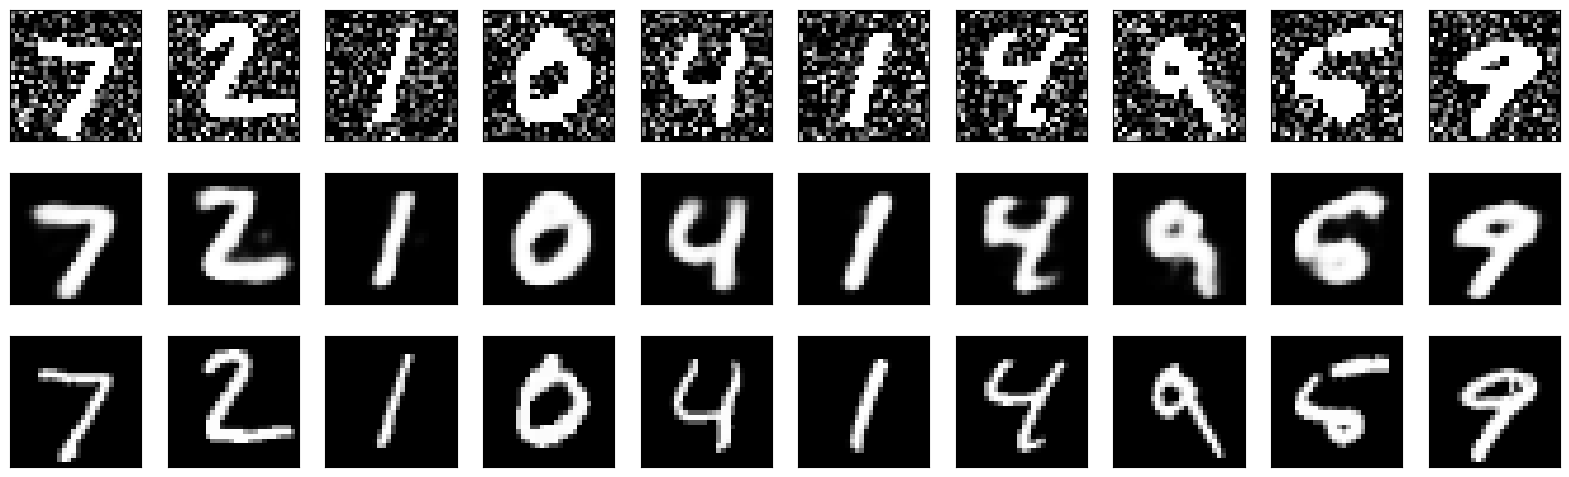

In [13]:

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Exercise 1

**Objective:** 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 


**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 

In [17]:
bottleneck_sizes =  [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
  # Encoder
  input_layer = Input(shape=(784,))
  encoded = Dense(64, activation='relu')(input_layer)
  bottleneck = Dense(size, activation='relu')(encoded)
  decoded = Dense(64, activation='relu')(bottleneck)
  output_layer = Dense(784, activation='sigmoid')(decoded)

  autoencoder = Model(input_layer, output_layer)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.fit(
    x_train, 
    x_train, 
    epochs=20, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test)
  )
  
  autoencoders.append(autoencoder)

for i, size in enumerate(bottleneck_sizes):
  loss = autoencoders[i].evaluate(x_test, x_test)
  print(f"Bottleneck size {size} - Test loss: {loss}")

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2653 - val_loss: -4632.8867
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1669 - val_loss: -12370.4805
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1512 - val_loss: -18062.1582
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1435 - val_loss: -24285.5195
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1368 - val_loss: -27742.2949
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1327 - val_loss: -29797.3184
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1290 - val_loss: -32572.2793
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1266 - val_loss: -33439.3242
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1250 - val_loss: -34034.9570
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1240 - val_loss: -33975.7734
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1231 - val_loss: -35020.109

## Exercise 2

**Objective:**

To explore the effect of regularization on the performance of the autoencoder. 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 

In [16]:
from tensorflow.keras.regularizers import l2

input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
bottleneck = Dense(size, activation='relu', kernel_regularizer=l2(0.01))(encoded)
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(
  x_train, 
  x_train, 
  epochs=50, 
  batch_size=256, 
  shuffle=True, 
  validation_data=(x_test, x_test)
)

loss = autoencoder.evaluate(x_test, x_test)
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0915 - val_loss: 3378.8459
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4061 - val_loss: 2338.6130
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3844 - val_loss: 1220.3099
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3692 - val_loss: 1042.6959
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3562 - val_loss: 515.8104
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3459 - val_loss: 419.4203
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3376 - val_loss: 254.5266
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3305 - val_loss: 151.0562
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3243 - val_loss: 111.1796
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3187 - val_loss: 80.9998
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3137 - val_loss: 57.5569
Epoch 12/50
235/235 ━━━━━━━━

## Exercise 3

**Objective:**

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 


**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step


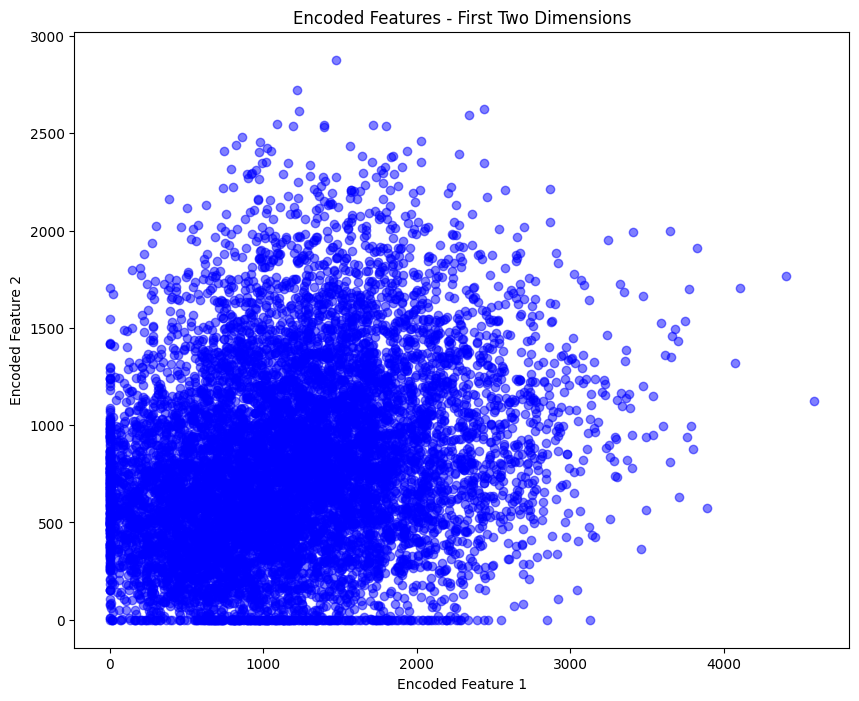

In [18]:
encoder_model = Model(input_layer, bottleneck)

encoded_imgs = encoder_model.predict(x_test)

plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()